## 🎬 Genre-Based Sentiment Analysis in Movie Reviews
This notebook performs data analysis using IMDb and Rotten Tomatoes datasets to explore how movie genres affect sentiment (as measured by ratings).

### 📌 Goal
To investigate whether genres like Action, Comedy, or Drama influence IMDb ratings using hypothesis testing and correlation analysis.

## **Step 1: Upload the Data to Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ratings_path = '/content/drive/MyDrive/title.ratings.tsv.gz'
basics_path = '/content/drive/MyDrive/title.basics.tsv.gz'
zip_path = '/content/drive/MyDrive/rotten_tomatoes_critic_reviews.csv.zip'


In [ ]:
with gzip.open(ratings_path, 'rb') as f_in:
    with open('title.ratings.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open(basics_path, 'rb') as f_in:
    with open('title.basics.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()


## **Step 2: Load the Data**

In [ ]:
import pandas as pd

# Load dataset from file
ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')
# Load dataset from file
basics_df = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)
# Load dataset from file
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Optional: preview
print(ratings_df.head())
print(basics_df.head())
print(rotten_reviews_df.head())


      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003            6.5      2187
3  tt0000004            5.3       187
4  tt0000005            6.2      2933
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12 

In [ ]:
import pandas as pd

# Load the metadata and reviews
# Load dataset from file
ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')
# Load dataset from file
basics_df = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)
# Load dataset from file
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Preview the data
print(ratings_df.head())
print(basics_df.head())
print(rotten_reviews_df.head())


      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003            6.5      2187
3  tt0000004            5.3       187
4  tt0000005            6.2      2933
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12 

## **Step 3: Visualize the Distribution of IMDb Average Ratings**

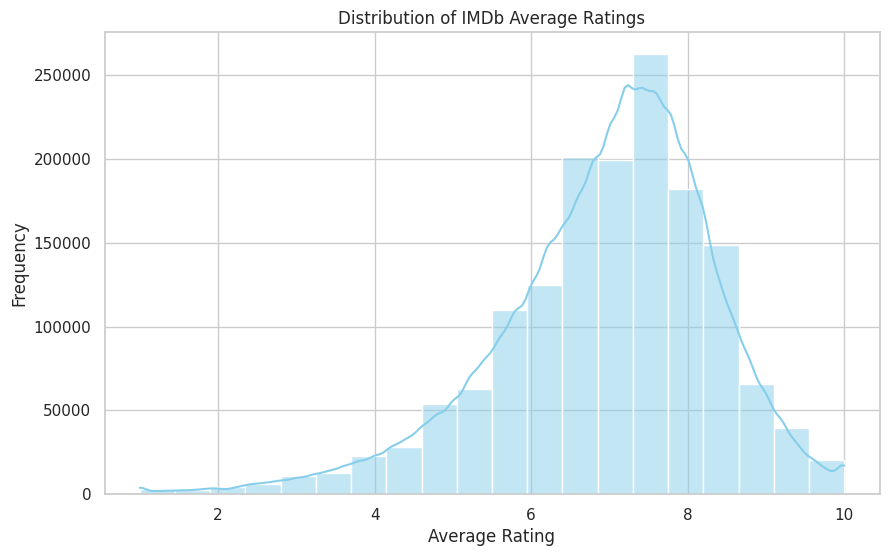

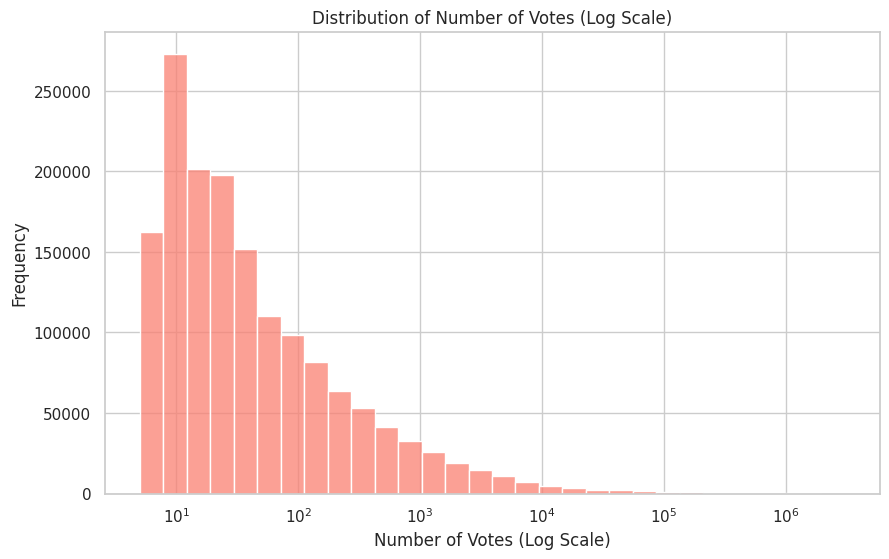

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Plot 1: Distribution of average ratings
plt.figure(figsize=(10, 6))
# Plot histogram of permutation differences
sns.histplot(ratings_df['averageRating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Distribution of number of votes (with log scale for better readability)
plt.figure(figsize=(10, 6))
# Plot histogram of permutation differences
sns.histplot(ratings_df['numVotes'], bins=30, kde=False, log_scale=(True, False), color='salmon')
plt.title('Distribution of Number of Votes (Log Scale)')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Frequency')
plt.show()


4. Genre-Based Analysis

<ipython-input-15-680ffd2d4434>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_rating', y='genres', data=genre_rating_sorted, palette='viridis')


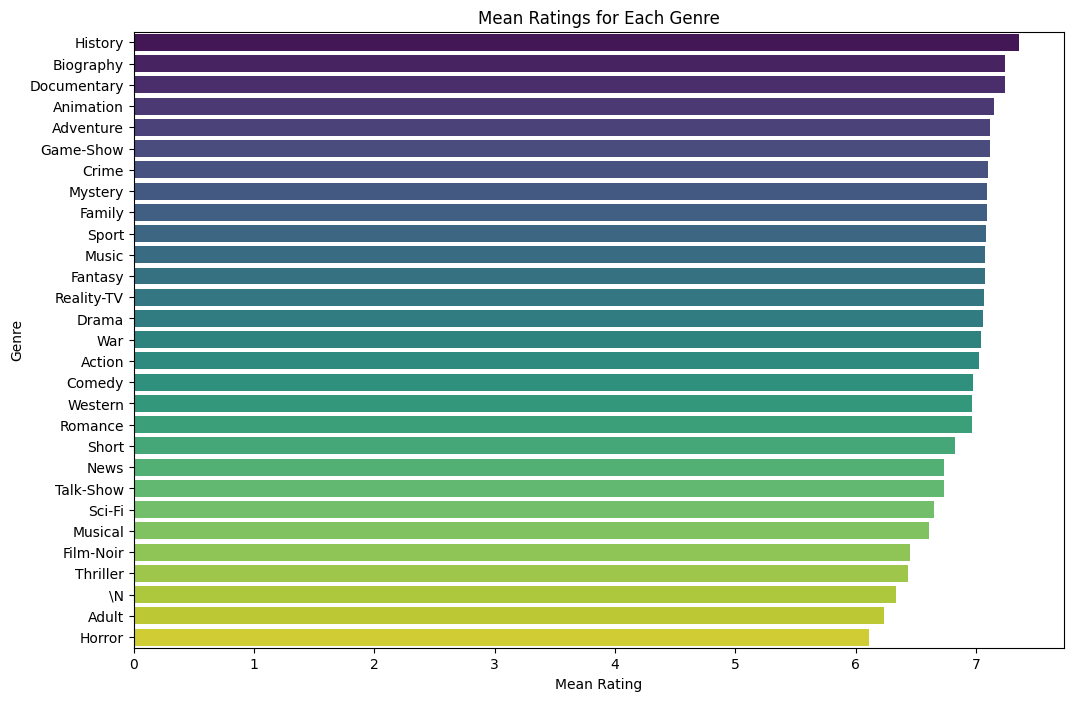

<ipython-input-15-680ffd2d4434>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_votes', y='genres', data=genre_rating_sorted, palette='coolwarm')


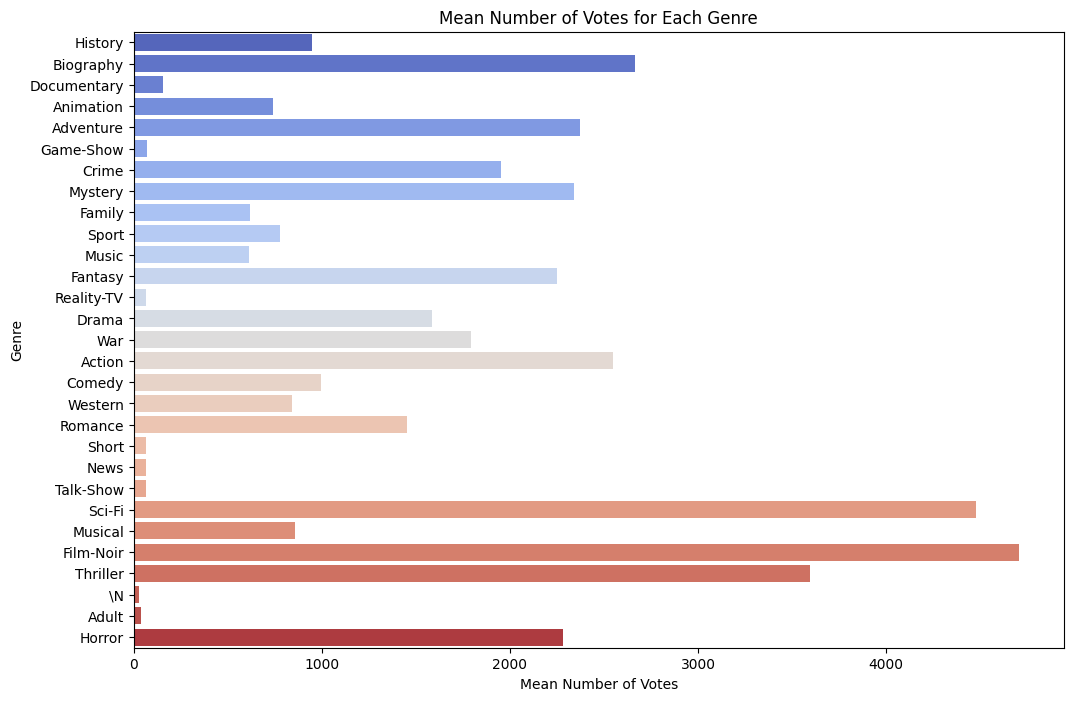

In [ ]:
# Merge the ratings and basics datasets on 'tconst'
# Merge datasets on 'tconst'
merged_df = pd.merge(exploded_genres_df, ratings_df, on='tconst', how='left')

# Now calculate the mean rating and vote count for each genre
# Merge datasets on 'tconst'
genre_rating = merged_df.groupby('genres').agg(
    mean_rating=('averageRating', 'mean'),
    mean_votes=('numVotes', 'mean')
).reset_index()

# Sort by mean rating
genre_rating_sorted = genre_rating.sort_values(by='mean_rating', ascending=False)

# Plot the mean ratings for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_rating', y='genres', data=genre_rating_sorted, palette='viridis')
plt.title('Mean Ratings for Each Genre')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.show()

# Plot the mean number of votes for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_votes', y='genres', data=genre_rating_sorted, palette='coolwarm')
plt.title('Mean Number of Votes for Each Genre')
plt.xlabel('Mean Number of Votes')
plt.ylabel('Genre')
plt.show()


5. Sentiment Analysis on Rotten Tomatoes Reviews

In [ ]:
import pandas as pd

# Load the metadata files (title.basics.tsv and title.ratings.tsv)
# Load dataset from file
basics_df = pd.read_csv('title.basics.tsv', sep='\t')
# Load dataset from file
ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')

# Check the first few rows to ensure proper loading
print(basics_df.head())
print(ratings_df.head())


<ipython-input-3-baf9ef18e592>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics_df = pd.read_csv('title.basics.tsv', sep='\t')


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short  
      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003   

In [ ]:
# Explode the 'genres' column to get a row for each genre in the 'genres' column
basics_df['genres'] = basics_df['genres'].fillna('')  # Fill NaNs in genres column
basics_df['genres'] = basics_df['genres'].apply(lambda x: x.split(',') if x else [])  # Split genres by commas

# Exploding genres into individual rows
exploded_genres_df = basics_df.explode('genres').reset_index(drop=True)

# Check the first few rows of exploded_genres_df
print(exploded_genres_df.head())


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000001     short              Carmencita              Carmencita   
2  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
3  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
4  tt0000003     short            Poor Pierrot          Pauvre Pierrot   

  isAdult startYear endYear runtimeMinutes       genres  
0       0      1894      \N              1  Documentary  
1       0      1894      \N              1        Short  
2       0      1892      \N              5    Animation  
3       0      1892      \N              5        Short  
4       0      1892      \N              5    Animation  


In [ ]:
# Merge exploded genres DataFrame with the ratings DataFrame
# Merge datasets on 'tconst'
merged_df = exploded_genres_df.merge(ratings_df[['tconst', 'averageRating', 'numVotes']], on='tconst', how='left')

# Merge datasets on 'tconst'
# Check the first few rows of the merged dataset
# Merge datasets on 'tconst'
print(merged_df.head())


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000001     short              Carmencita              Carmencita   
2  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
3  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
4  tt0000003     short            Poor Pierrot          Pauvre Pierrot   

  isAdult startYear endYear runtimeMinutes       genres  averageRating  \
0       0      1894      \N              1  Documentary            5.7   
1       0      1894      \N              1        Short            5.7   
2       0      1892      \N              5    Animation            5.5   
3       0      1892      \N              5        Short            5.5   
4       0      1892      \N              5    Animation            6.5   

   numVotes  
0    2151.0  
1    2151.0  
2     292.0  
3     292.0  
4    2187.0  


In [ ]:
# Group by 'genres' and calculate mean rating and mean vote count for each genre
# Merge datasets on 'tconst'
genre_rating = merged_df.groupby('genres').agg(
    mean_rating=('averageRating', 'mean'),
    mean_votes=('numVotes', 'mean')
).reset_index()

# Sort the genres by mean rating and mean votes
genre_rating = genre_rating.sort_values(by='mean_rating', ascending=False)

# Check the top genres by mean rating
print(genre_rating.head())


         genres  mean_rating   mean_votes
13      History     7.360161   947.787874
4     Biography     7.237644  2662.976442
7   Documentary     7.236274   157.694770
3     Animation     7.147066   739.674331
2     Adventure     7.116337  2374.375199


In [ ]:
# Load the Rotten Tomatoes reviews CSV file
# Load dataset from file
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Display the first few rows to check the data
print(rotten_reviews_df.head())


  rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Light

In [ ]:
print("Columns in rotten_reviews_df:", rotten_reviews_df.columns)
# Merge datasets on 'tconst'
print("Columns in merged_df:", merged_df.columns)


Columns in rotten_reviews_df: Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')
Columns in merged_df: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')


In [ ]:
# Extract the tconst-like identifier from 'rotten_tomatoes_link'
rotten_reviews_df['tconst'] = rotten_reviews_df['rotten_tomatoes_link'].str.replace('m/', 'tt', regex=False)

# Now try merging again based on 'tconst'
# Merge datasets on 'tconst'
rotten_reviews_merged = rotten_reviews_df.merge(merged_df[['tconst', 'genres']], on='tconst', how='left')

# Merge datasets on 'tconst'
# Check the result of the merge
# Merge datasets on 'tconst'
print(rotten_reviews_merged.head())


  rotten_tomatoes_link      critic_name  top_critic  publisher_name  \
0            m/0814255  Andrew L. Urban       False  Urban Cinefile   
1            m/0814255  Andrew L. Urban       False  Urban Cinefile   
2            m/0814255  Andrew L. Urban       False  Urban Cinefile   
3            m/0814255    Louise Keller       False  Urban Cinefile   
4            m/0814255    Louise Keller       False  Urban Cinefile   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-06   
3       Fresh          NaN  2010-02-06   
4       Fresh          NaN  2010-02-06   

                                      review_content     tconst     genres  
0  A fantasy adventure that fuses Greek mythology...  tt0814255  Adventure  
1  A fantasy adventure that fuses Greek mythology...  tt0814255     Family  
2  A fantasy adventure that fuses Greek mythology...  tt0814255    Fantasy  
3  Uma Thurm

In [ ]:
# Filter the reviews where 'review_type' is either 'Fresh' or 'Rotten'
# Merge datasets on 'tconst'
fresh_rotten_reviews = rotten_reviews_merged[rotten_reviews_merged['review_type'].isin(['Fresh', 'Rotten'])]

# Calculate the proportion of Fresh/Rotten reviews for each genre
genre_review_proportions = fresh_rotten_reviews.groupby('genres')['review_type'].value_counts(normalize=True).unstack().fillna(0)

# Print the proportions
print(genre_review_proportions)


review_type     Fresh    Rotten
genres                         
Adventure    0.489933  0.510067
Comedy       0.772222  0.227778
Drama        0.772222  0.227778
Family       0.489933  0.510067
Fantasy      0.489933  0.510067
News         0.296296  0.703704
Sport        0.296296  0.703704


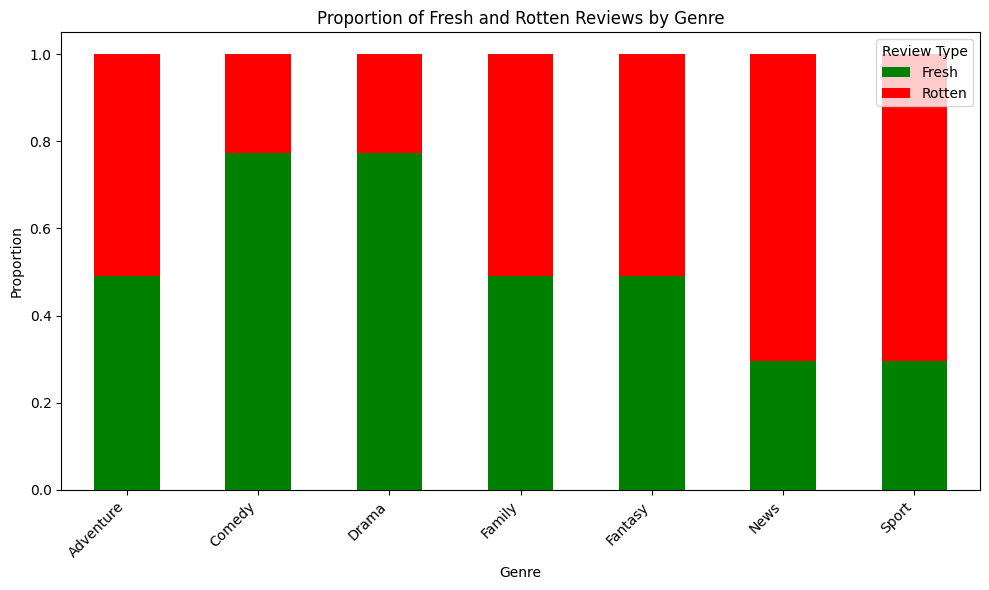

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the review_type_proportions DataFrame from the output
data = {
    'Fresh': [0.489933, 0.772222, 0.772222, 0.489933, 0.489933, 0.296296, 0.296296],
    'Rotten': [0.510067, 0.227778, 0.227778, 0.510067, 0.510067, 0.703704, 0.703704]
}

# List of genres
genres = ['Adventure', 'Comedy', 'Drama', 'Family', 'Fantasy', 'News', 'Sport']

# Create the DataFrame
review_type_proportions = pd.DataFrame(data, index=genres)

# Plotting the proportions of Fresh and Rotten reviews for each genre
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
review_type_proportions.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

# Adding labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Fresh and Rotten Reviews by Genre')
ax.legend(title='Review Type', labels=['Fresh', 'Rotten'], loc='upper right')

# Displaying the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1. Data Transformation (Sentiment Score Extraction)

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


Apply VADER sentiment analysis to Rotten Tomatoes reviews:

In [ ]:
# Check the columns of rotten_reviews_df to identify the correct column name for the review text
print(rotten_reviews_df.columns)


Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content',
       'tconst'],
      dtype='object')


In [ ]:
# Check for missing values in 'review_content'
print(rotten_reviews_df['review_content'].isnull().sum())


65806


In [ ]:
# Option 1: Fill missing review content with an empty string
rotten_reviews_df['review_content'] = rotten_reviews_df['review_content'].fillna('')

# Option 2: Drop rows with missing review content
# Drop missing values
# rotten_reviews_df = rotten_reviews_df.dropna(subset=['review_content'])


In [ ]:
# Apply VADER sentiment analysis to 'review_content'
rotten_reviews_df['sentiment_score'] = rotten_reviews_df['review_content'].apply(get_sentiment)


In [ ]:
# Inspect the first few review contents to check for any issues
print(rotten_reviews_df['review_content'].head())


0    A fantasy adventure that fuses Greek mythology...
1    Uma Thurman as Medusa, the gorgon with a coiff...
2    With a top-notch cast and dazzling special eff...
3    Whether audiences will get behind The Lightnin...
4    What's really lacking in The Lightning Thief i...
Name: review_content, dtype: object


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply VADER sentiment analysis
rotten_reviews_df['sentiment_score'] = rotten_reviews_df['review_content'].apply(get_sentiment)


In [ ]:
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

rotten_reviews_df['sentiment_label'] = rotten_reviews_df['sentiment_score'].apply(label_sentiment)


<ipython-input-66-c6153255820c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sentiment, x='sentiment_score', y='genres', palette='coolwarm')


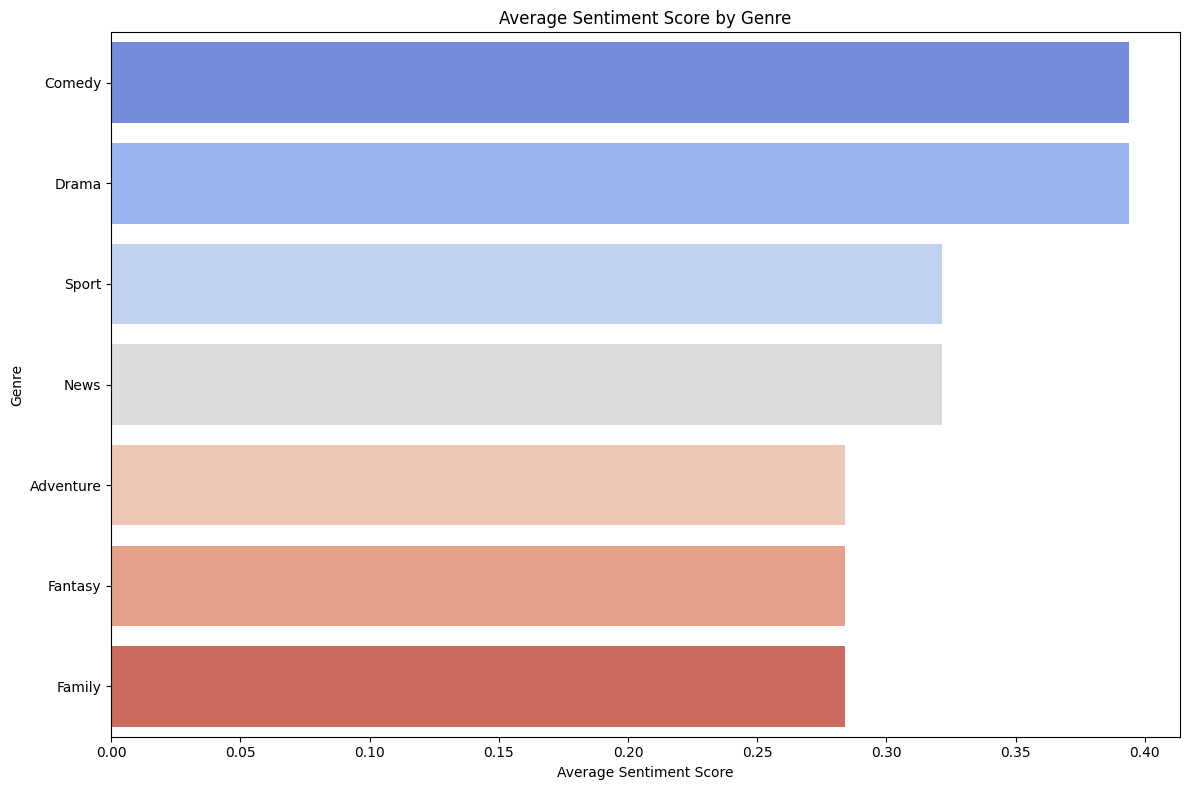

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge genres into Rotten Tomatoes reviews (again, just to be sure)
# Merge datasets on 'tconst'
rotten_reviews_df = rotten_reviews_df.merge(merged_df[['tconst', 'genres']], on='tconst', how='left')

# Group by genre and calculate mean sentiment score
genre_sentiment = rotten_reviews_df.groupby('genres')['sentiment_score'].mean().reset_index()

# Sort genres by sentiment score
genre_sentiment = genre_sentiment.sort_values(by='sentiment_score', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_sentiment, x='sentiment_score', y='genres', palette='coolwarm')
plt.title('Average Sentiment Score by Genre')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


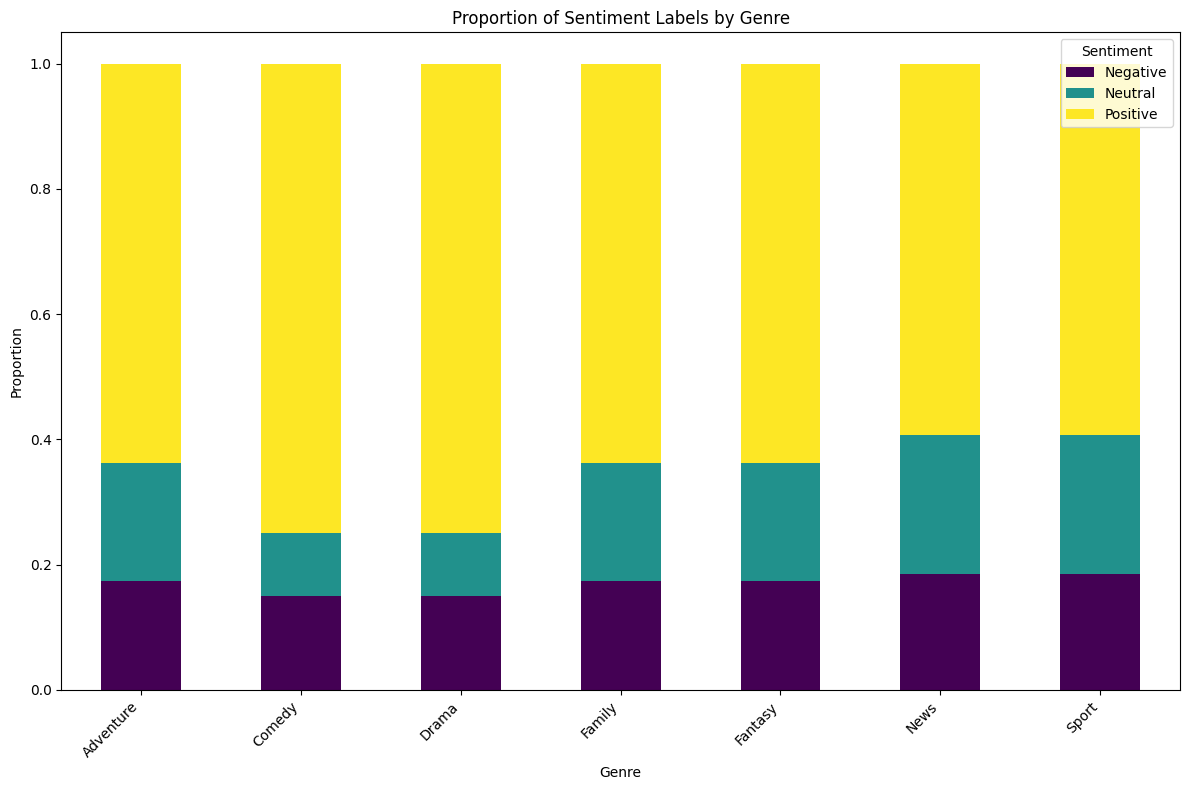

In [ ]:
# Group by genre and sentiment label, then count
genre_label_counts = rotten_reviews_df.groupby(['genres', 'sentiment_label']).size().unstack().fillna(0)

# Normalize for proportions
genre_label_props = genre_label_counts.div(genre_label_counts.sum(axis=1), axis=0)

# Plot
genre_label_props.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Proportion of Sentiment Labels by Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


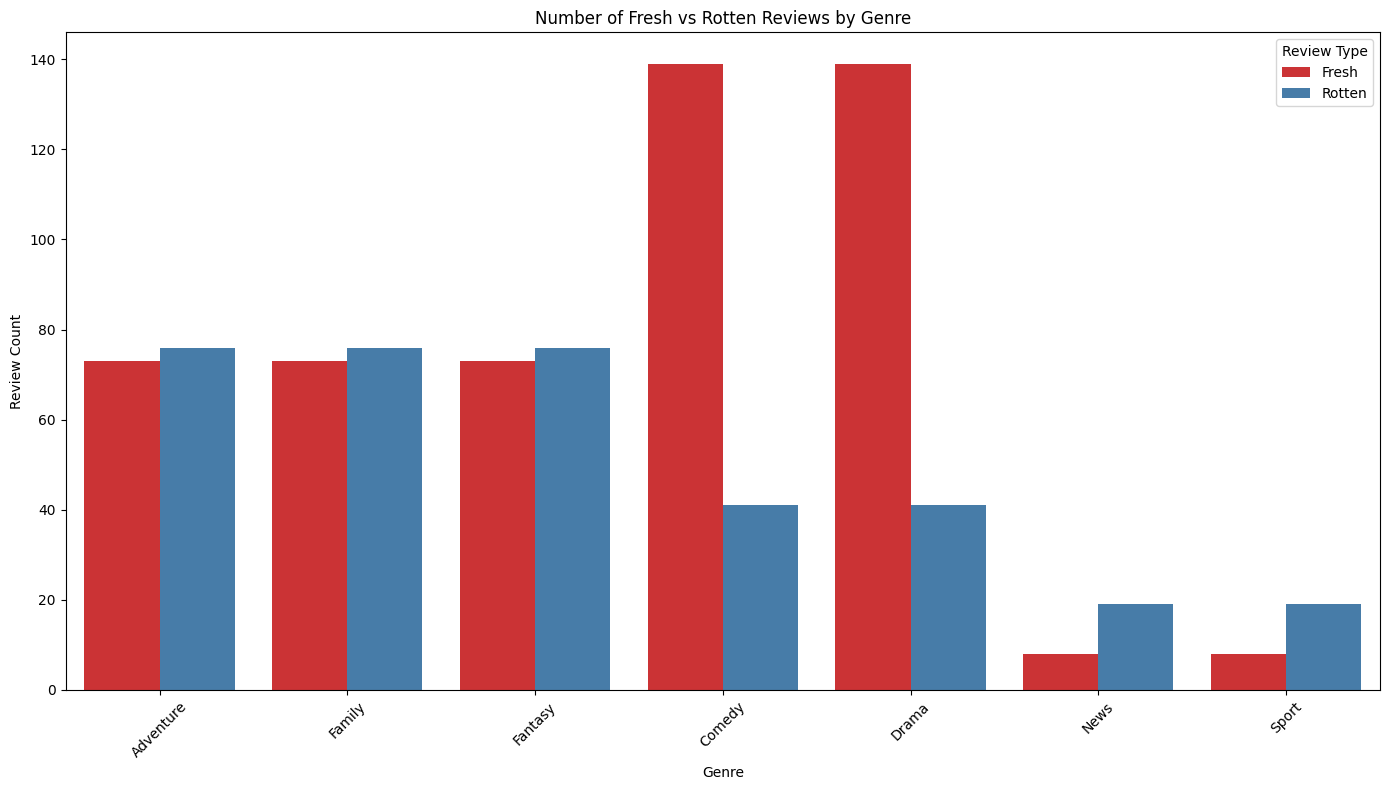

In [ ]:
plt.figure(figsize=(14, 8))
# Merge datasets on 'tconst'
sns.countplot(data=rotten_reviews_merged, x='genres', hue='review_type', palette='Set1')
plt.title('Number of Fresh vs Rotten Reviews by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Review Count')
plt.legend(title='Review Type')
plt.tight_layout()
plt.show()


## **Step-by-Step: Correlation Visualization**

## **Step 3: Hypothesis Testing with Your IMDb Data**

𝐻
0
H
0
​
 : There is no difference in average ratings between movies with the target genre and those without.

𝐻
𝐴
H
A
​
 : There is a significant difference in average ratings.


3.1: Load and Merge the Data

In [ ]:
import pandas as pd

# Load the datasets
# Load dataset from file
df_basics = pd.read_csv('title.basics.tsv', sep='\t', dtype=str)
# Load dataset from file
df_ratings = pd.read_csv('title.ratings.tsv', sep='\t', dtype=str)

# Filter for movies (excluding TV shows and adult content)
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]

# Merge with ratings data
# Merge datasets on 'tconst'
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')

# Convert ratings to numeric
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')

# Drop rows with missing ratings
# Drop missing values
df = df.dropna(subset=['averageRating'])


3.2: Calculate Correlation Coefficients

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gzip
import shutil

# Define paths
base_path = '/content/drive/MyDrive/'  # Adjust if your files are in a subfolder

# Unzip title.basics.tsv.gz
with gzip.open(base_path + 'title.basics.tsv.gz', 'rb') as f_in:
    with open('/content/title.basics.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Unzip title.ratings.tsv.gz
with gzip.open(base_path + 'title.ratings.tsv.gz', 'rb') as f_in:
    with open('/content/title.ratings.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Unzip rotten_tomatoes_critic_reviews.csv.zip
import zipfile

with zipfile.ZipFile(base_path + 'rotten_tomatoes_critic_reviews.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [ ]:
import pandas as pd

# Load dataset from file
df_basics = pd.read_csv('/content/title.basics.tsv', sep='\t', dtype=str)
# Load dataset from file
df_ratings = pd.read_csv('/content/title.ratings.tsv', sep='\t', dtype=str)
# Load dataset from file
df_reviews = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')


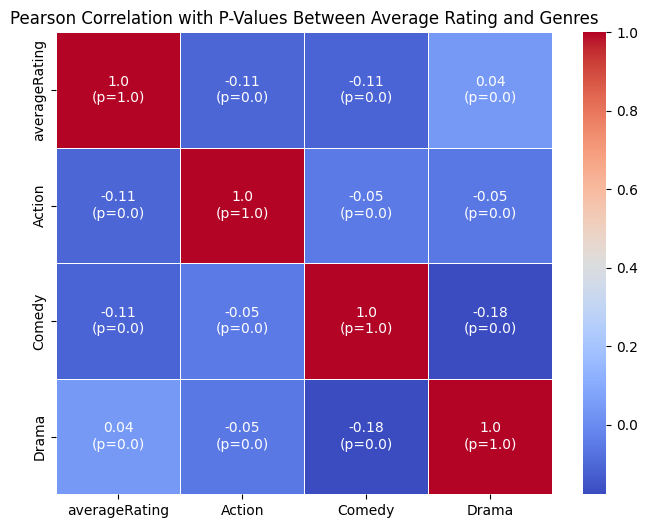

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
# Load dataset from file
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
# Load dataset from file
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Merge datasets on 'tconst'
# Filter and merge
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]
# Merge datasets on 'tconst'
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
# Drop missing values
df = df.dropna(subset=['averageRating'])

# Create binary genre columns
for genre in df['genres'].str.split(',', expand=True).stack().unique():
# Convert boolean to binary (0 or 1)
    df[genre] = df['genres'].str.contains(genre, case=False, na=False, regex=False).astype(int)

# Select relevant columns
genres = ['Action', 'Comedy', 'Drama']
data = df[['averageRating'] + genres]

# Compute correlations and p-values
def corr_with_pvalues(df):
    cols = df.columns
    corr = df.corr()
    pvals = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                r, p = stats.pearsonr(df[cols[i]], df[cols[j]])
                pvals.iloc[i, j] = p
    return corr, pvals

corr_matrix, pval_matrix = corr_with_pvalues(data)

# Annotate correlation with p-values
annot = corr_matrix.round(2).astype(str) + "\n(p=" + pval_matrix.round(3).astype(str) + ")"

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=annot, fmt='', cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation with P-Values Between Average Rating and Genres')
plt.show()


Randomization Test (Permutation Test) for Genre vs Rating

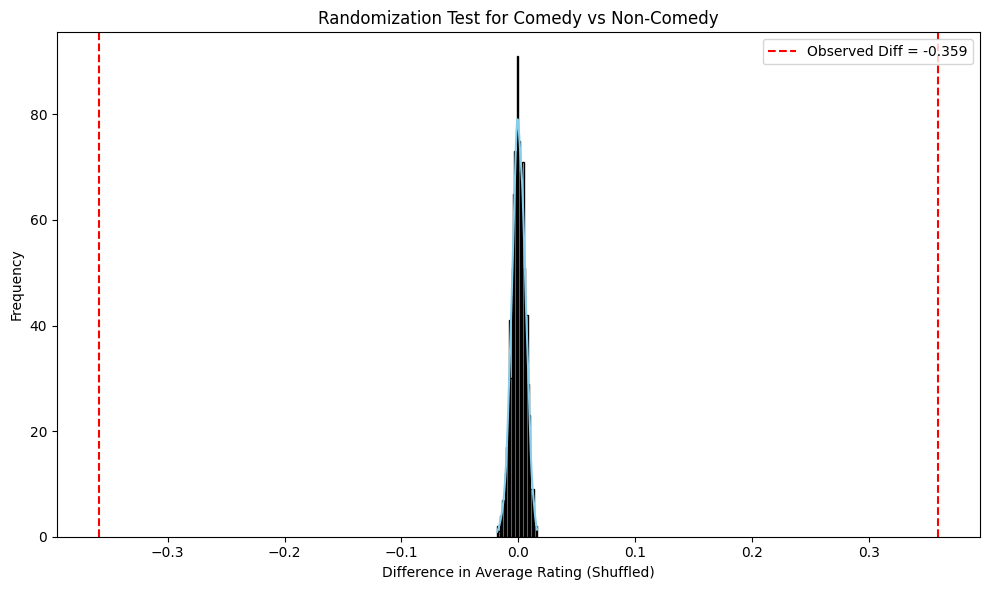

Observed Difference in Means: -0.3587
Permutation Test p-value: < 0.0010
Reject the null hypothesis: There is a significant difference.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from your Google Drive
# Load dataset from file
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
# Load dataset from file
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Filter and clean
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]
# Merge datasets on 'tconst'
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
# Drop missing values
df = df.dropna(subset=['averageRating'])

# Select one genre to test (you can change 'Comedy' to any other genre)
target_genre = 'Comedy'

# Create a binary column for the target genre
# Convert boolean to binary (0 or 1)
df[target_genre] = df['genres'].str.contains(target_genre, case=False, na=False).astype(int)

# Observed difference in means
group1 = df[df[target_genre] == 1]['averageRating']
group2 = df[df[target_genre] == 0]['averageRating']
# Calculate observed difference in means between genre and non-genre movies
observed_diff = group1.mean() - group2.mean()

# Randomization test (permutation test)
n_permutations = 1000
diffs = []

for _ in range(n_permutations):
# Shuffle genre labels for permutation
    shuffled = df[target_genre].sample(frac=1, replace=False).reset_index(drop=True)
    diff = df[shuffled == 1]['averageRating'].mean() - df[shuffled == 0]['averageRating'].mean()
# Store permutation test results
    diffs.append(diff)

# Calculate p-value
# Compute p-value from permutation test
p_val = np.mean(np.abs(diffs) >= np.abs(observed_diff))
# Compute p-value from permutation test
if p_val == 0:
# Compute p-value from permutation test
    p_val_str = f"< {1/n_permutations:.4f}"
else:
# Compute p-value from permutation test
    p_val_str = f"{p_val:.4f}"

# Null hypothesis decision based on p-value
alpha = 0.05  # Significance level
if p_val < alpha:
    hypothesis_result = "Reject the null hypothesis: There is a significant difference."
else:
    hypothesis_result = "Fail to reject the null hypothesis: No significant difference."

# Plot
plt.figure(figsize=(10,6))
# Plot histogram of permutation differences
sns.histplot(diffs, kde=True, color='skyblue', bins=30)
# Add line to indicate observed difference
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.3f}')
# Add line to indicate observed difference
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title(f'Randomization Test for {target_genre} vs Non-{target_genre}')
plt.xlabel('Difference in Average Rating (Shuffled)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Display result
print(f"Observed Difference in Means: {observed_diff:.4f}")
print(f"Permutation Test p-value: {p_val_str}")
# Display test result interpretation
print(hypothesis_result)


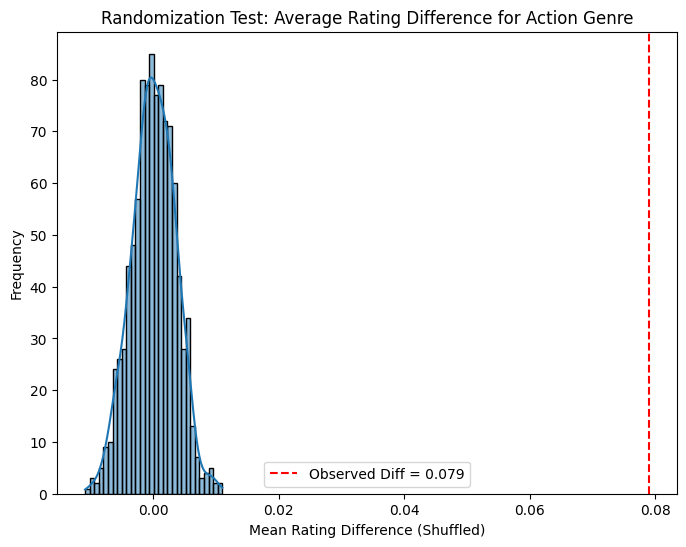

Permutation test p-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average ratings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from your Google Drive
# Load dataset from file
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
# Load dataset from file
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Merging the data on 'tconst'
# Merge datasets on 'tconst'
df = pd.merge(df_basics[['tconst', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')

# Convert 'averageRating' to numeric (in case it's read as string)
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')

# Step 1: Create a column for the 'Action' genre
# Convert boolean to binary (0 or 1)
df['Action'] = df['genres'].str.contains('Action', case=False, na=False).astype(int)

# Step 2: Observed difference in average rating between Action and non-Action movies
# Calculate observed difference in means between genre and non-genre movies
observed_diff = df[df['Action'] == 1]['averageRating'].mean() - df[df['Action'] == 0]['averageRating'].mean()

# Permutation test
n_permutations = 1000
diffs = []
for _ in range(n_permutations):
    shuffled = np.random.permutation(df['Action'])
    diff = df[shuffled == 1]['averageRating'].mean() - df[shuffled == 0]['averageRating'].mean()
# Store permutation test results
    diffs.append(diff)

# Step 3: Plotting the histogram of shuffled differences
plt.figure(figsize=(8, 6))
# Plot histogram of permutation differences
sns.histplot(diffs, bins=30, kde=True)
# Add line to indicate observed difference
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.3f}')
plt.title('Randomization Test: Average Rating Difference for Action Genre')
plt.xlabel('Mean Rating Difference (Shuffled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 4: Calculate p-value
# Compute p-value from permutation test
p_val = np.mean(np.abs(diffs) >= np.abs(observed_diff))
print(f"Permutation test p-value: {p_val:.4f}")

# Step 5: Hypothesis testing decision
alpha = 0.05  # Significance level
if p_val < alpha:
# Display test result interpretation
    print("Reject the null hypothesis: There is a significant difference in the average ratings.")
else:
# Display test result interpretation
    print("Fail to reject the null hypothesis: No significant difference in the average ratings.")
